<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 2
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

16:19:26 INFO << load arm CSV.
16:19:26 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 2)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:51<00:00, 17.04s/it]


16:29:31 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
16:29:31 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


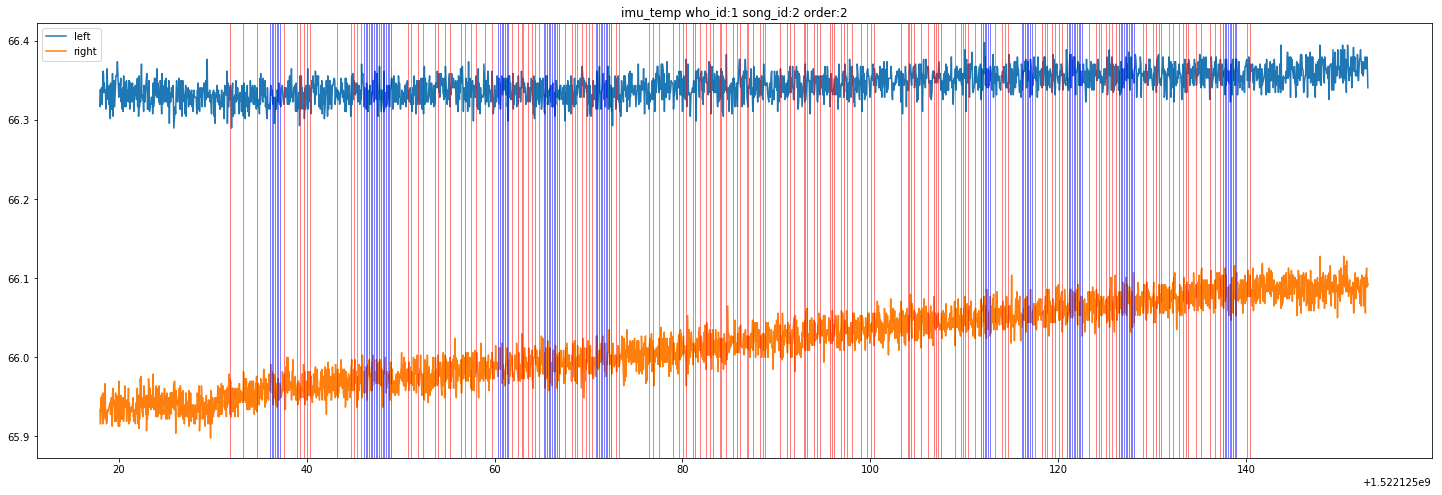

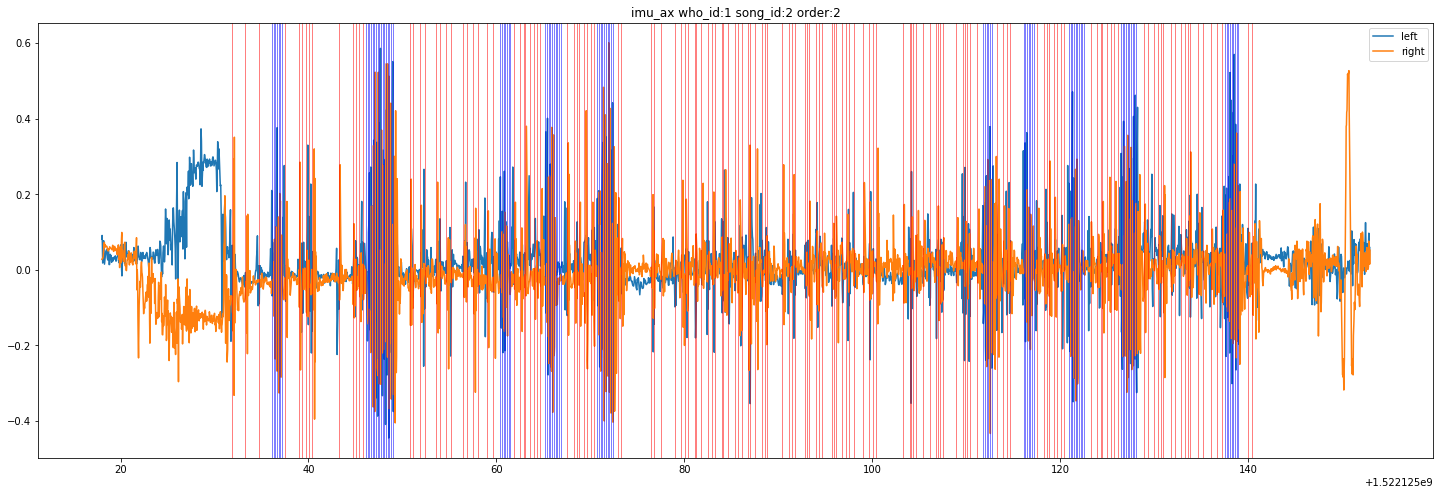

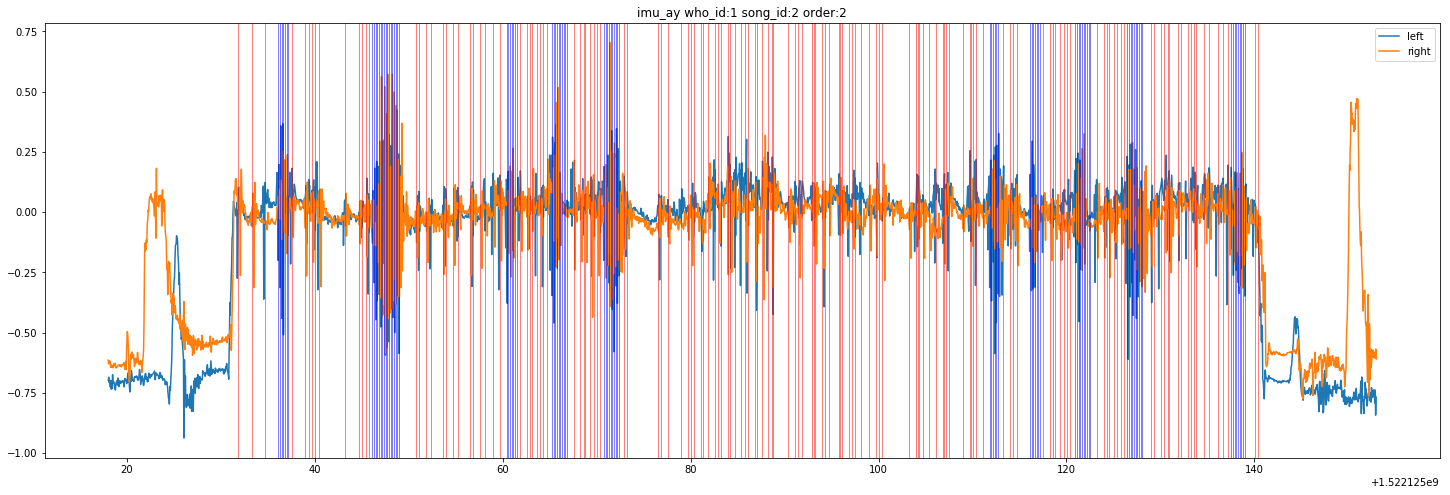

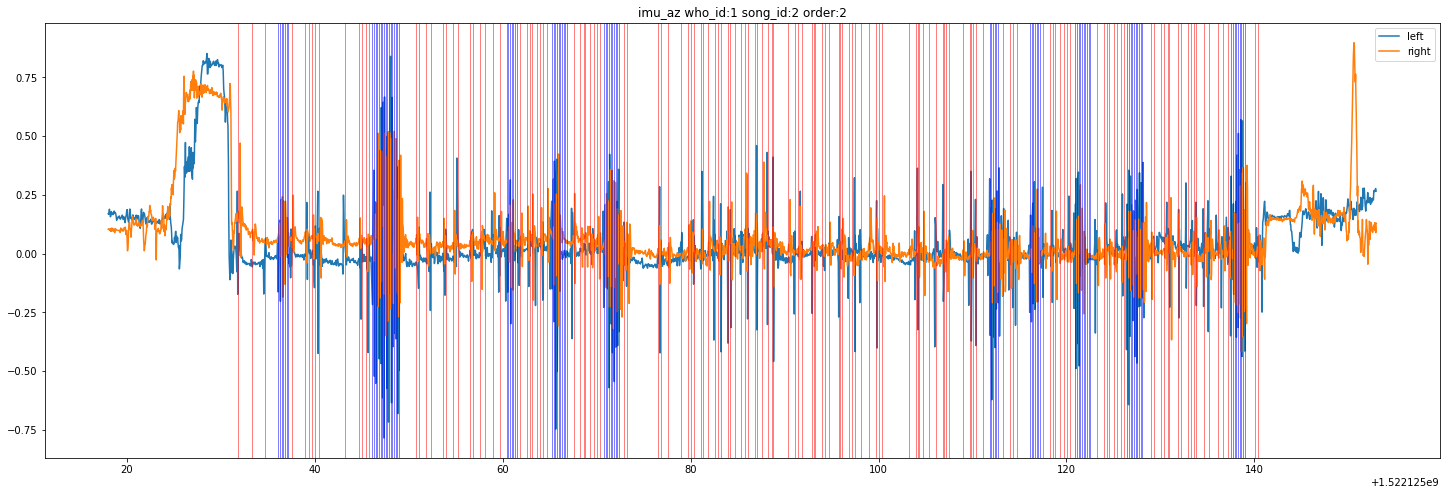

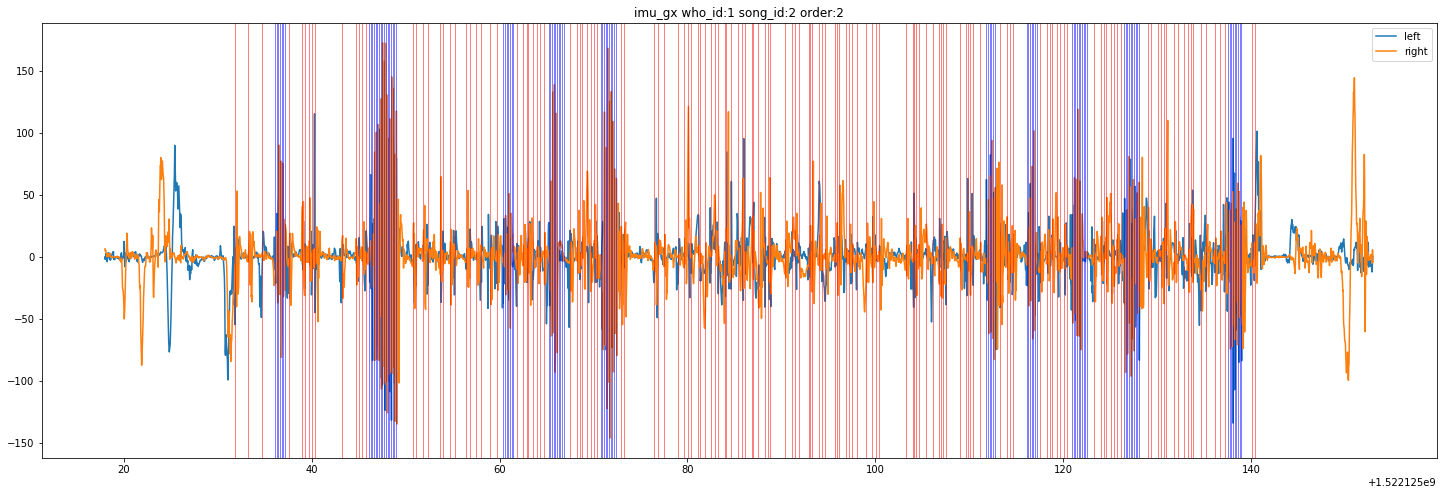

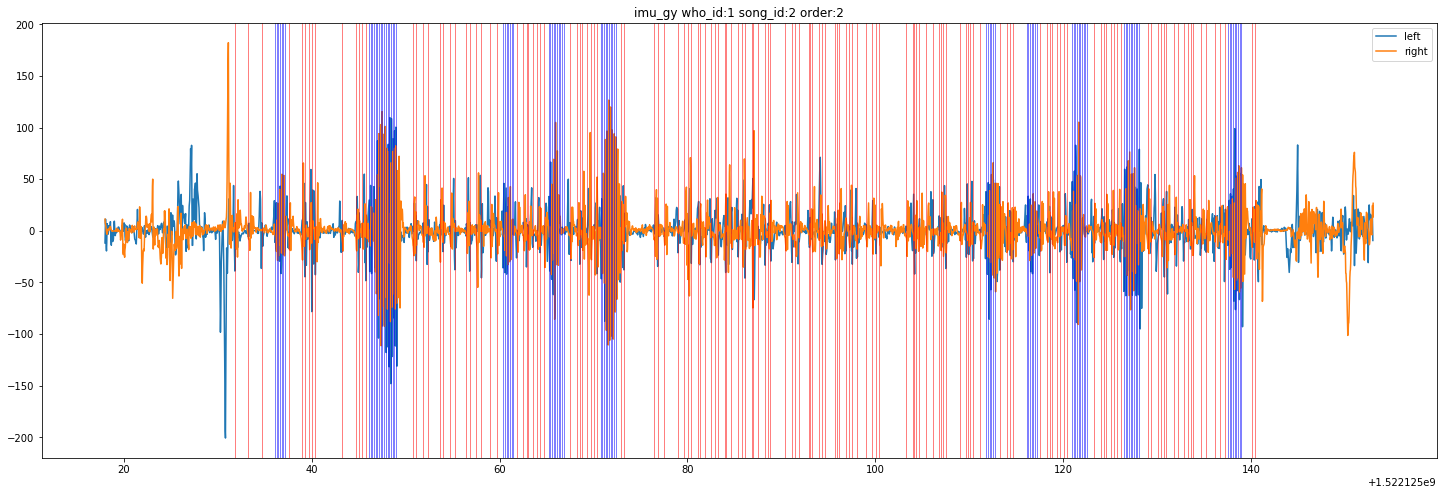

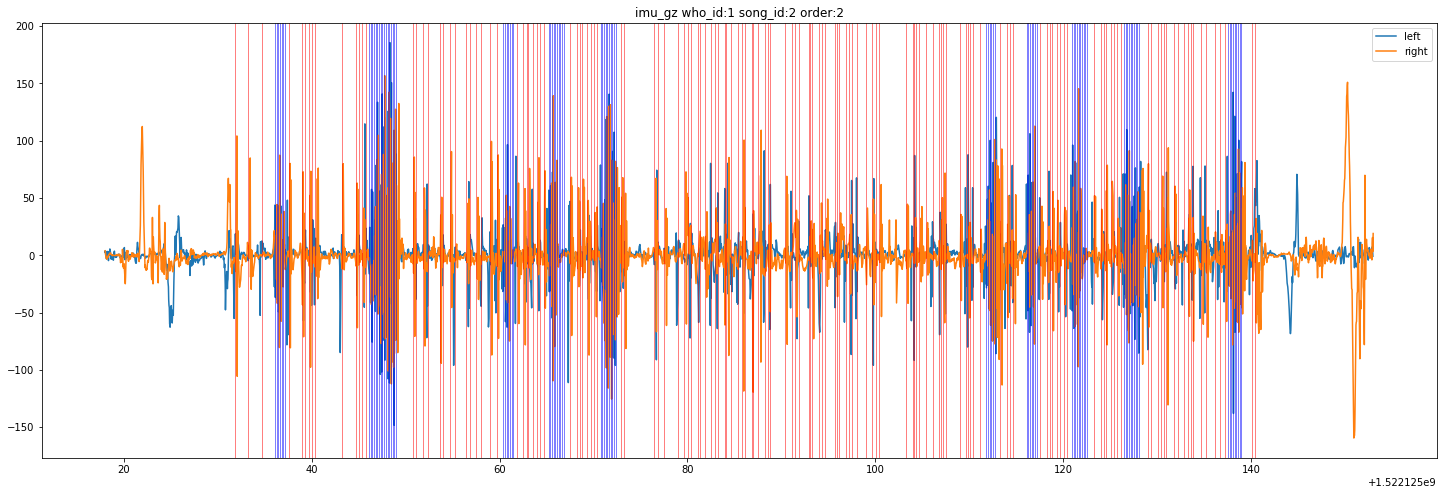

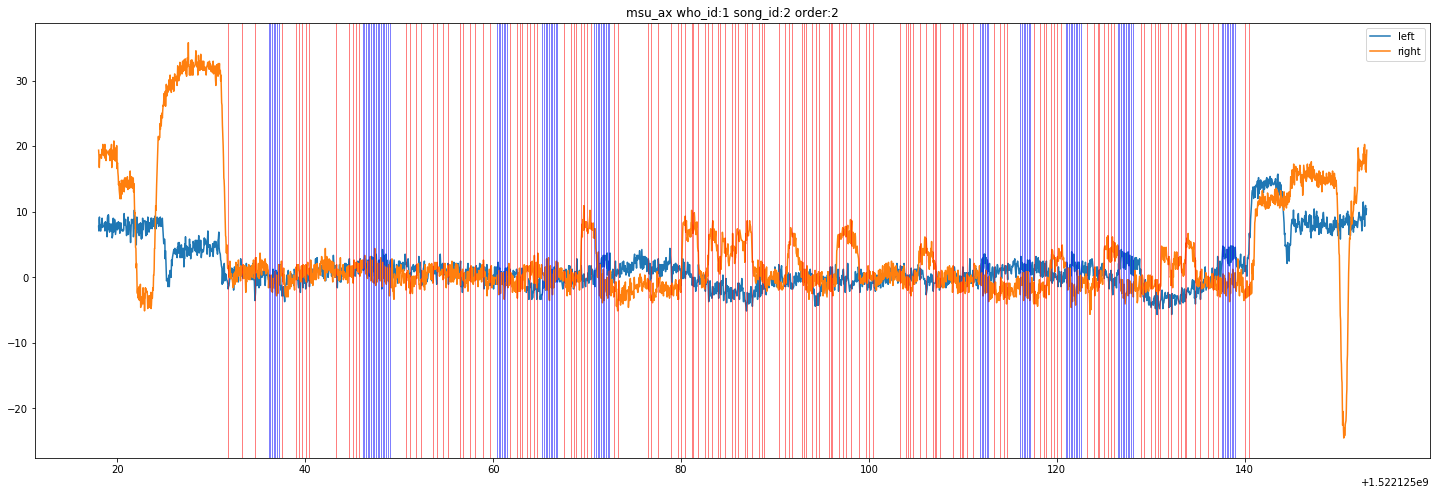

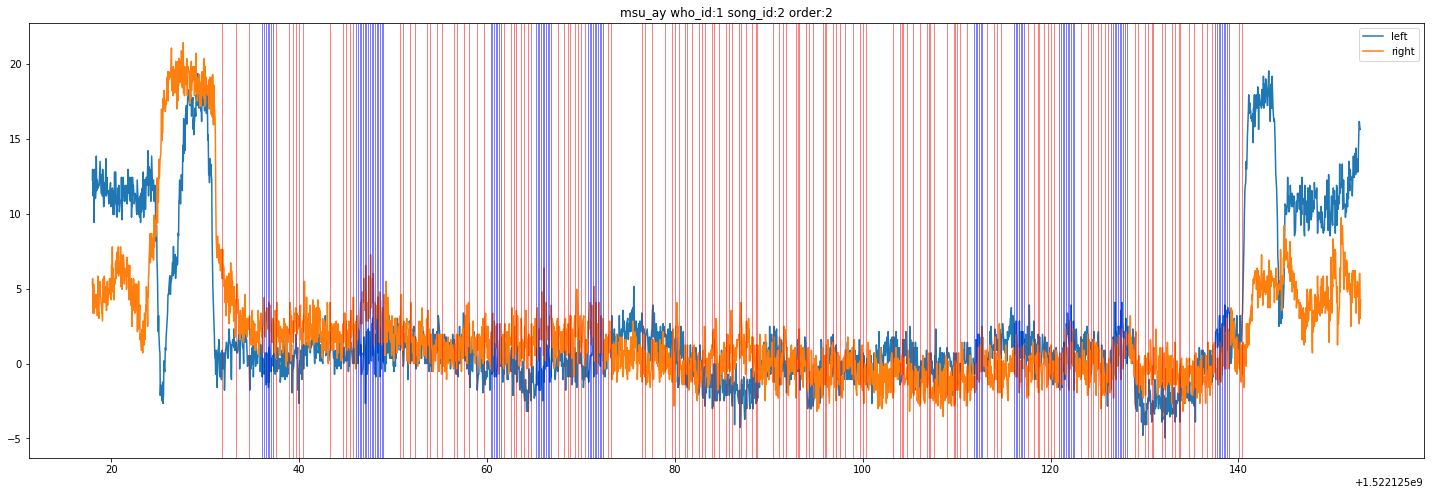

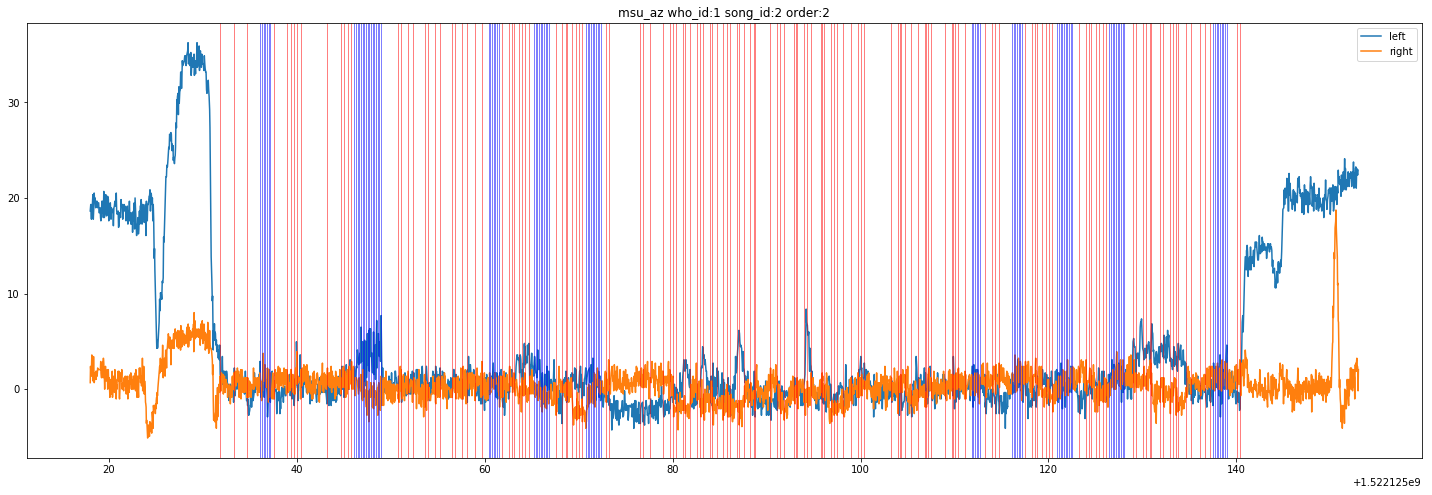

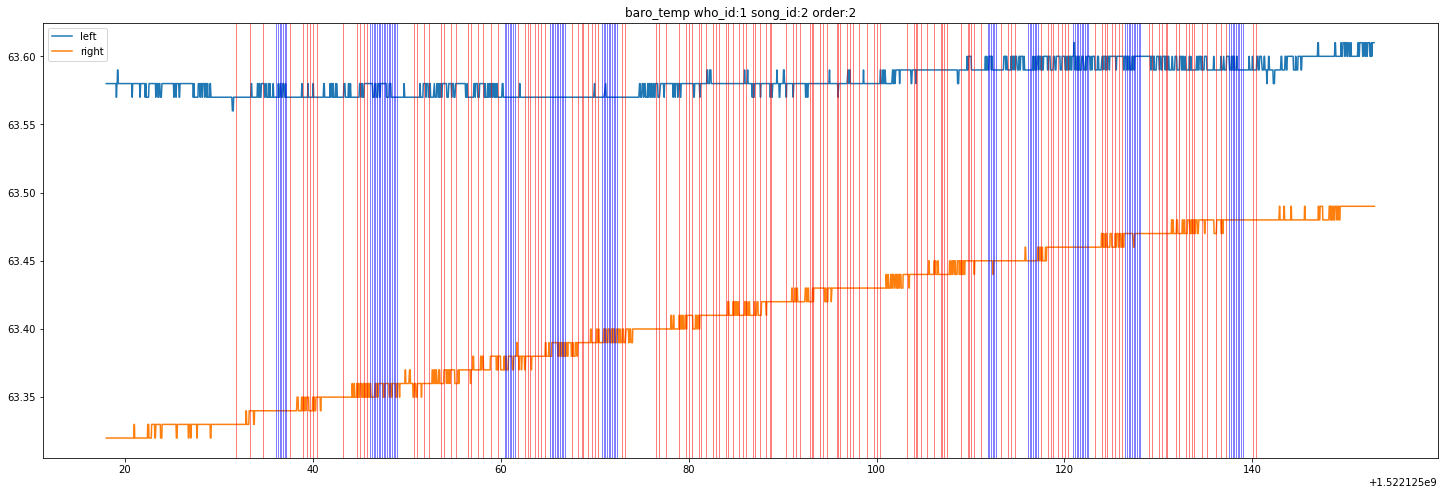

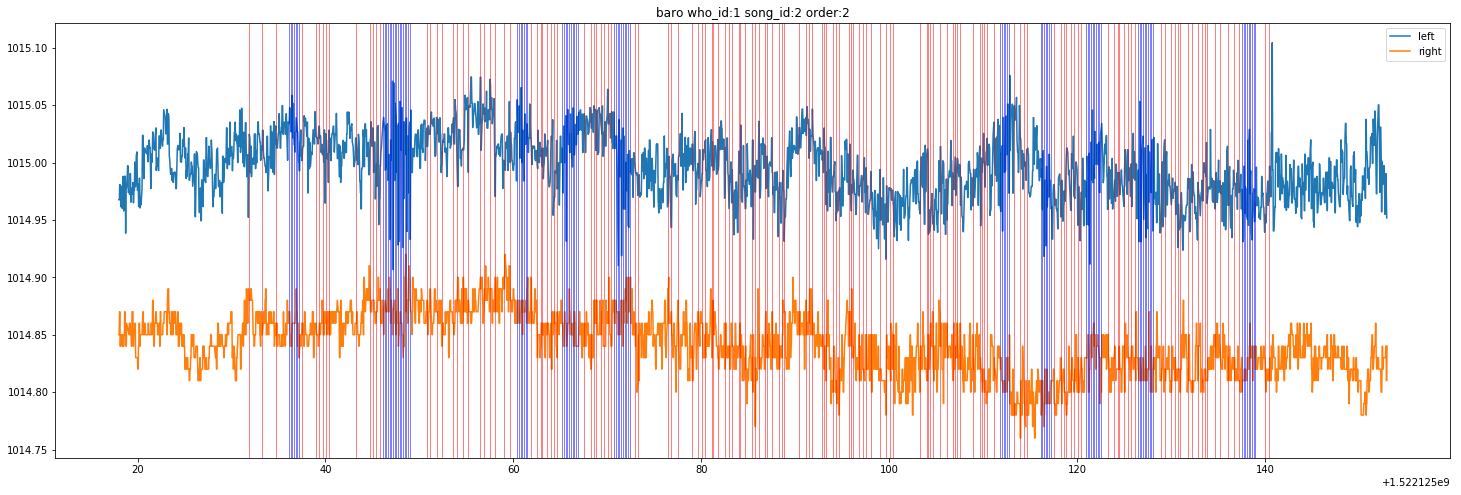

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.722134,5.085050e-05,0.928000,11.059295,33.415776,13.813000,0.521528,155.723783,0.724783,11.811095,...,0.500000,0.166667,0.666667,0.166667,0.139462,-0.357597,0.024469,0.947768,0.944803,0.898573
1,0.738698,2.060968e-04,0.927250,6.597746,14.567482,9.006250,0.545881,58.097735,0.741174,6.677545,...,0.400000,0.400000,0.600000,0.600000,-0.763043,0.699841,-0.725423,0.739703,0.618167,0.467903
2,0.729061,3.963658e-04,0.924750,4.946384,3.276362,7.432500,0.531926,27.743074,0.733185,5.391469,...,0.400000,0.600000,0.400000,0.600000,-0.465240,0.984982,-0.449197,0.880714,0.019282,0.337690
3,0.735774,6.770406e-05,0.925667,11.116856,5.380905,15.206333,0.541431,128.965383,0.734138,9.732685,...,0.166667,0.166667,0.166667,0.166667,-0.852263,0.050168,0.189331,0.840123,0.824931,0.424430
4,0.747636,1.740110e-04,0.924667,5.766903,16.859966,8.756333,0.559134,50.117138,0.755490,3.043937,...,0.250000,0.500000,0.250000,0.500000,-0.839165,-0.606428,0.103356,0.419650,0.217082,0.788892
5,0.727069,1.050055e-04,0.892667,2.734651,1.409944,3.969500,0.528735,8.888258,0.727624,2.165174,...,0.400000,0.200000,0.400000,0.200000,-0.187574,0.512973,0.627508,0.506779,0.932316,0.359884
6,0.723729,7.051387e-06,0.888000,1.810417,1.233675,2.309000,0.523790,4.511286,0.723641,1.142238,...,0.400000,0.400000,0.400000,0.600000,0.697217,0.641813,0.907087,-0.942377,0.859931,-0.959099
7,0.721267,4.307304e-06,0.889667,3.281711,0.688875,5.009333,0.520231,11.458502,0.722452,3.625792,...,0.166667,0.166667,0.500000,0.166667,-0.398950,0.150215,0.014351,0.619778,0.067263,0.052674
8,0.722978,1.507169e-04,0.895750,3.736471,2.460862,5.741500,0.522848,16.422078,0.720346,4.098320,...,0.250000,0.500000,0.250000,0.500000,-0.969178,-0.486141,0.631479,-0.087355,0.926201,-0.450890
9,0.713085,7.552231e-05,0.884333,4.070251,1.966601,5.393667,0.508566,18.533540,0.710893,4.748698,...,0.400000,0.200000,0.400000,0.200000,0.638726,0.001634,0.365398,0.465256,0.593120,-0.212458


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.59704255 -0.42511424  1.10953847 ... -0.08716798 -0.36390286
  -1.15678233]
 [ 1.57211144 -0.42318363  1.09944331 ... -1.25031484  1.42573792
  -0.84013048]
 [ 1.69229861 -0.41659291  1.16350033 ... -1.33849926  0.93743782
  -1.04641192]
 ...
 [ 1.63247513 -0.42594134  0.97154717 ...  1.61183276  1.42506658
   1.78016631]
 [ 1.63444988 -0.42233785  0.96446604 ...  0.87892832  0.46183698
   1.95729974]
 [ 1.6224642  -0.42500933  0.94649085 ...  1.65796357  1.46912514
   1.96951588]]


100%|██████████| 609/609 [00:39<00:00, 15.30it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:40<00:00, 15.17it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91891892 0.08108108]
 [0.35483871 0.64516129]]


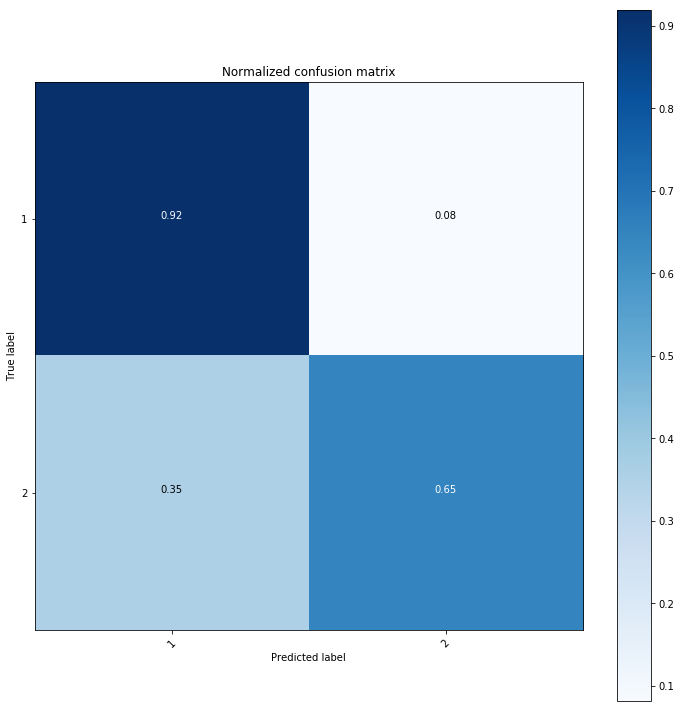

predicting 2 performance


100%|██████████| 609/609 [00:40<00:00, 15.16it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.9527027  0.0472973 ]
 [0.37634409 0.62365591]]


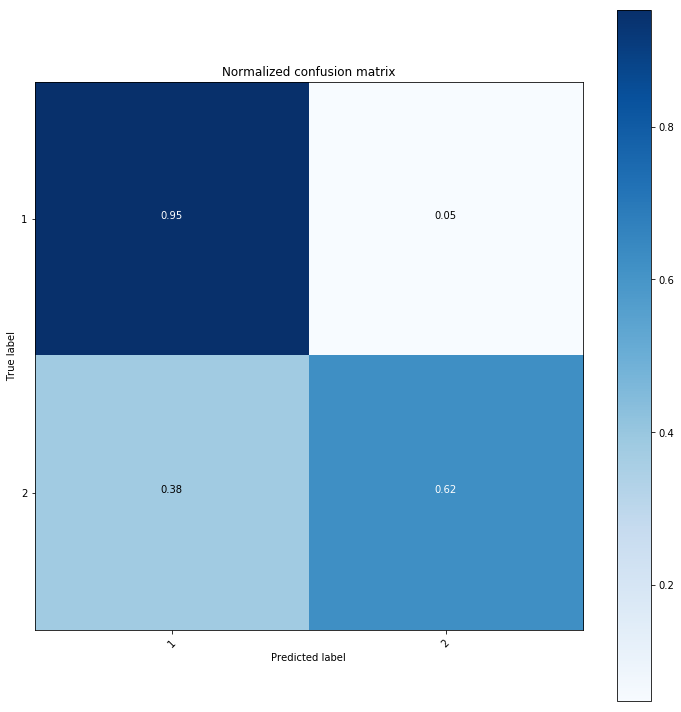

predicting 3 performance


100%|██████████| 609/609 [00:40<00:00, 15.08it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97972973 0.02027027]
 [0.1827957  0.8172043 ]]


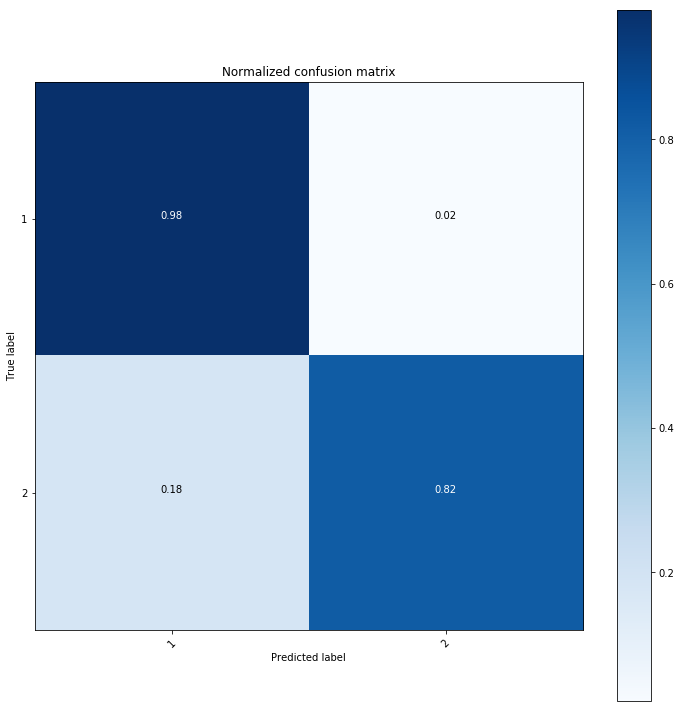

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[-0.62988286 -0.19534141 -0.66591178 ...  1.06712434  1.20043503
   0.40442396]
 [-0.64199969 -0.1941742  -0.6675958  ... -1.28445304 -1.21946369
   0.79631542]
 [-0.59098003 -0.19473447 -0.61000223 ... -0.52885336 -0.51643464
  -1.68724401]
 ...
 [ 0.04625594 -0.19215404 -0.09401767 ... -0.29482445  0.62594703
  -0.37658603]
 [ 0.31228204 -0.19340914  0.08280471 ... -0.51203316  0.20754275
  -1.30057977]
 [ 0.38811209 -0.19450567  0.10604422 ...  1.10897777 -1.23647906
  -2.10670095]]


100%|██████████| 609/609 [00:39<00:00, 15.26it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:40<00:00, 15.22it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02702703 0.97297297]
 [0.01075269 0.98924731]]


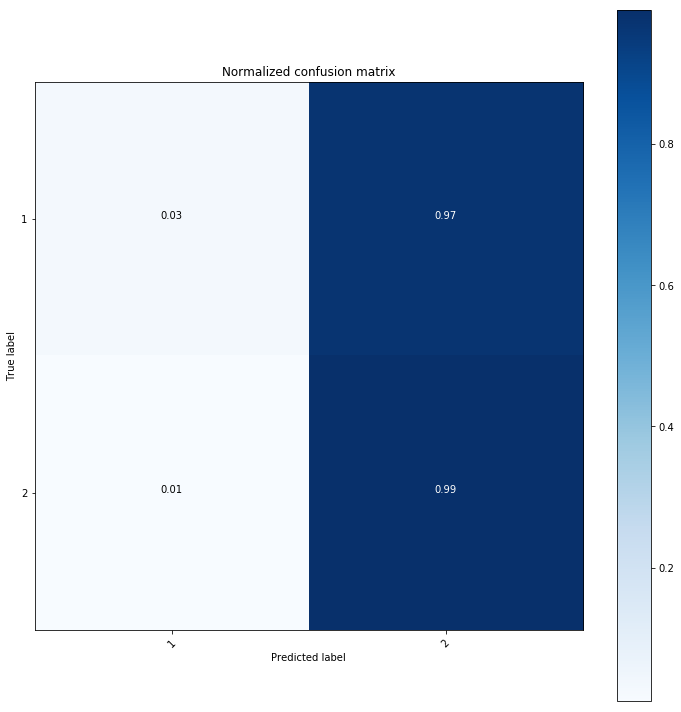

predicting 2 performance


100%|██████████| 609/609 [00:40<00:00, 15.15it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.37634409 0.62365591]]


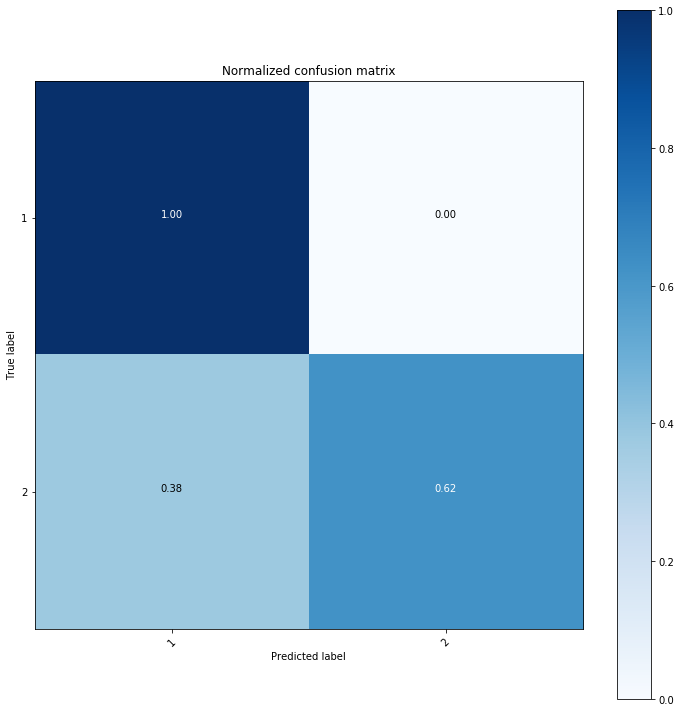

predicting 3 performance


100%|██████████| 609/609 [00:39<00:00, 15.32it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97972973 0.02027027]
 [0.01075269 0.98924731]]


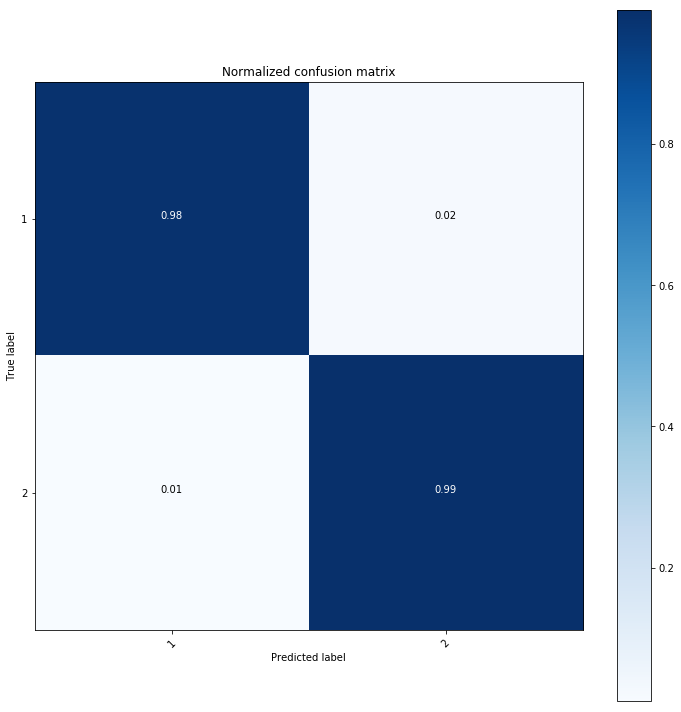

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[-1.15860721e-01 -3.33579992e-01 -2.28552374e-01 ... -3.96706680e-01
  -1.00428714e+00 -1.41485920e+00]
 [-1.68367612e-01 -3.33820013e-01 -2.46329866e-01 ...  5.96929341e-01
   4.80867961e-02 -1.33923923e+00]
 [-1.51202502e-01 -3.33416406e-01 -2.25133625e-01 ... -6.54868142e-01
  -2.83466438e-01 -8.82161724e-01]
 ...
 [ 2.19911950e-01 -3.30797171e-01 -1.79966888e-04 ...  1.70976770e+00
   1.33606473e+00  9.93175691e-01]
 [ 1.47873104e-01 -3.30778354e-01  5.97378060e-03 ...  6.16010006e-01
   1.17598771e+00  1.43582278e-01]
 [ 1.85217202e-01 -3.13004531e-01  2.10162744e-02 ...  1.11183868e+00
   1.36967361e+00  5.13524832e-01]]


100%|██████████| 609/609 [00:40<00:00, 15.05it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:40<00:00, 15.08it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94594595 0.05405405]
 [0.20430108 0.79569892]]


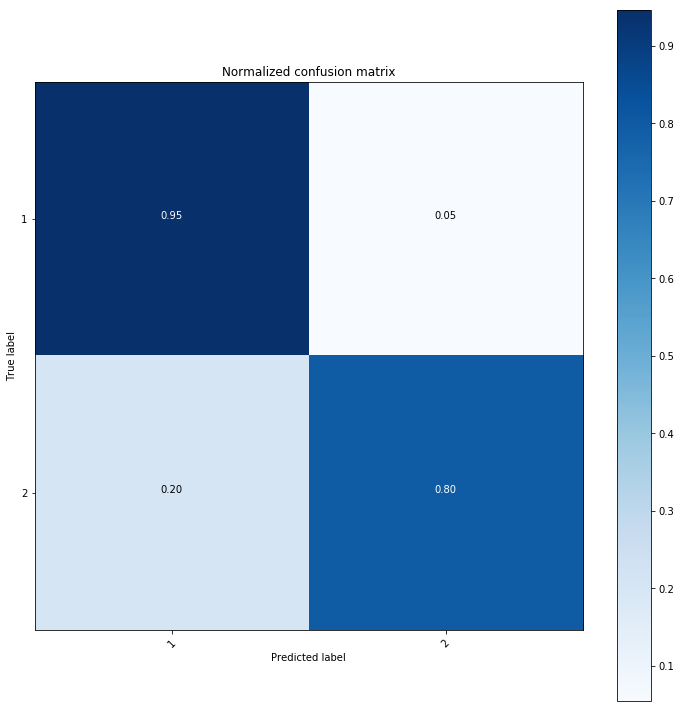

predicting 2 performance


100%|██████████| 609/609 [00:39<00:00, 15.30it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91216216 0.08783784]
 [0.27956989 0.72043011]]


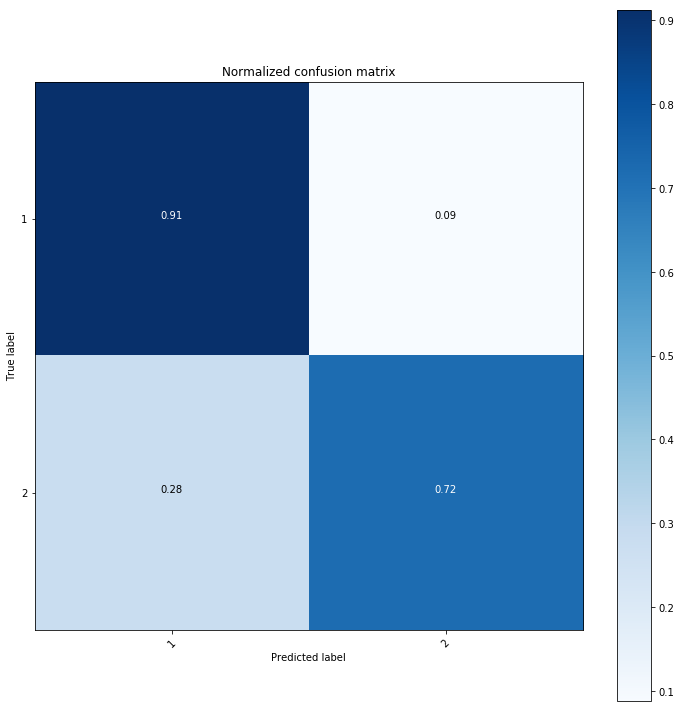

predicting 3 performance


100%|██████████| 609/609 [00:39<00:00, 15.39it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.03225806 0.96774194]]


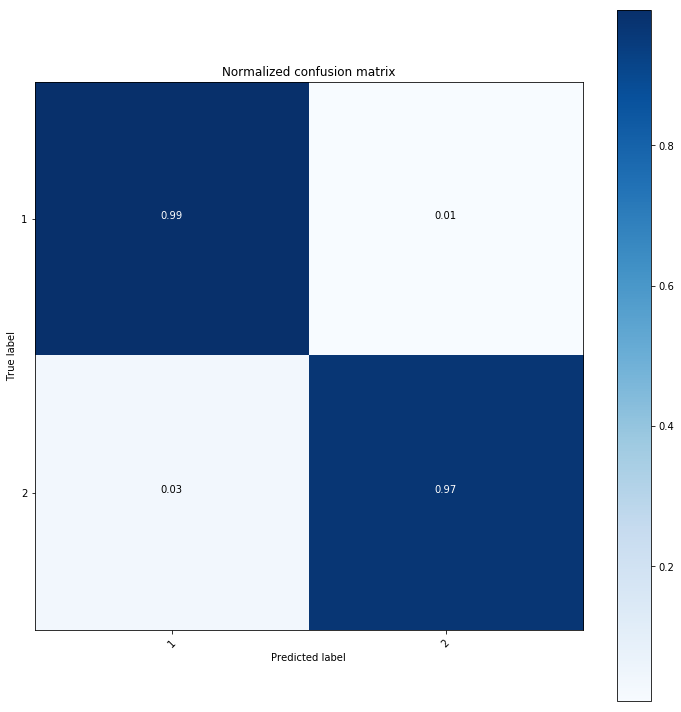

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[-1.13270911 -0.38023188 -0.93767952 ... -1.49421087  0.37293834
  -1.27927317]
 [-1.12957597 -0.37867802 -0.92527781 ... -0.65334511  0.22645417
  -1.77105357]
 [-1.17240651 -0.37969487 -0.96558336 ... -1.32434558  0.9178018
  -1.50480389]
 ...
 [-1.516149   -0.38018681 -1.39673648 ... -1.50588708  0.98860798
  -1.95061321]
 [-1.5097671  -0.38019509 -1.40138712 ... -0.5488195   0.19968637
   0.44256794]
 [-1.50195015 -0.38020411 -1.39092318 ... -1.40909521 -0.61708464
  -0.11947008]]


100%|██████████| 609/609 [00:39<00:00, 15.45it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:39<00:00, 15.40it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91891892 0.08108108]
 [0.25806452 0.74193548]]


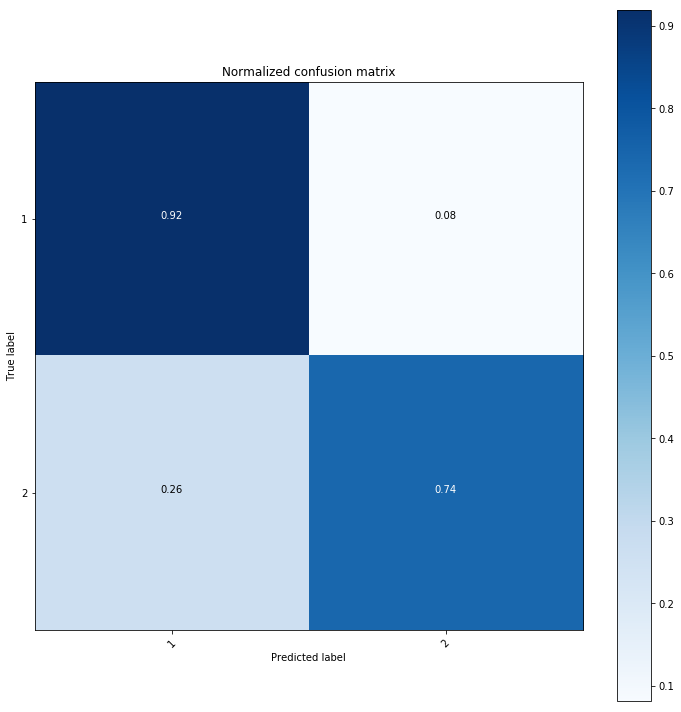

predicting 2 performance


100%|██████████| 609/609 [00:39<00:00, 15.37it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91891892 0.08108108]
 [0.27956989 0.72043011]]


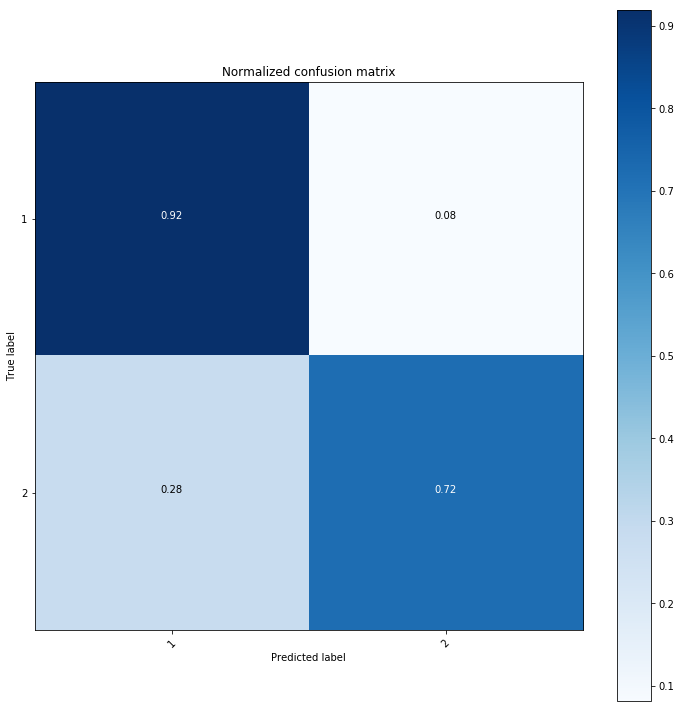

predicting 3 performance


100%|██████████| 609/609 [00:39<00:00, 15.46it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98648649 0.01351351]
 [0.06451613 0.93548387]]


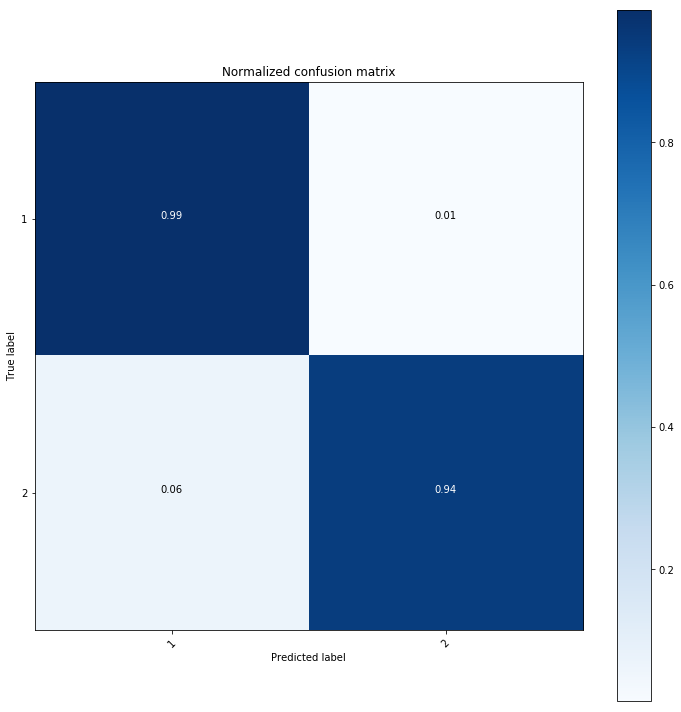

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[ 0.236326   -0.53594283  0.22436751 ...  0.02825794  0.66805896
  -1.14040876]
 [ 0.78348703 -0.17901554  0.62990163 ... -1.26771063  1.5596867
  -1.37930666]
 [ 0.56102887 -0.51431539  0.54652078 ... -1.18034192  0.68400903
  -1.05988796]
 ...
 [ 3.39469686 -0.25398404  4.46921064 ...  1.4701037   0.13457089
  -0.23520456]
 [ 2.52019902 -0.26023238  3.25260828 ...  0.59577216  0.39197309
  -1.29430896]
 [ 2.25676105 -0.33916744  2.06506288 ...  0.88085519 -1.12300744
  -0.83624088]]


100%|██████████| 609/609 [00:39<00:00, 15.27it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:39<00:00, 15.38it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.81756757 0.18243243]
 [0.08602151 0.91397849]]


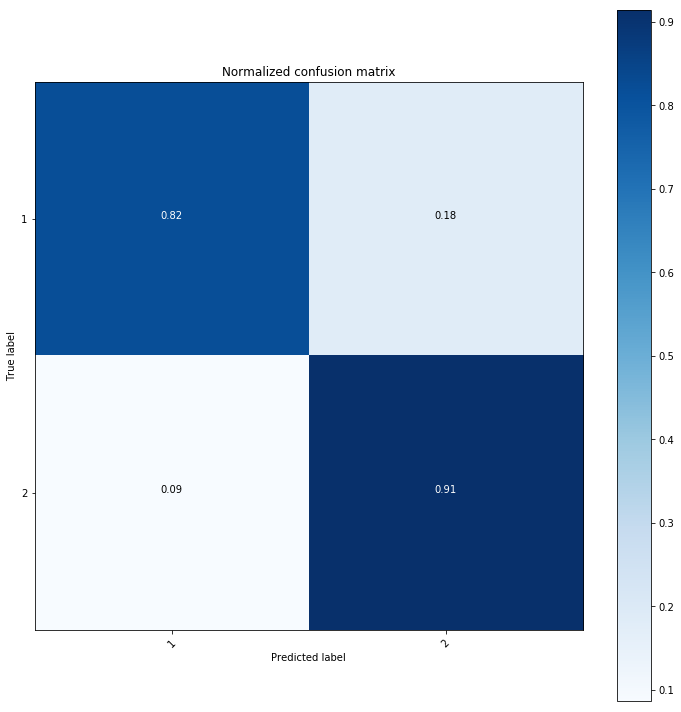

predicting 2 performance


100%|██████████| 609/609 [00:39<00:00, 15.32it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.90540541 0.09459459]
 [0.16129032 0.83870968]]


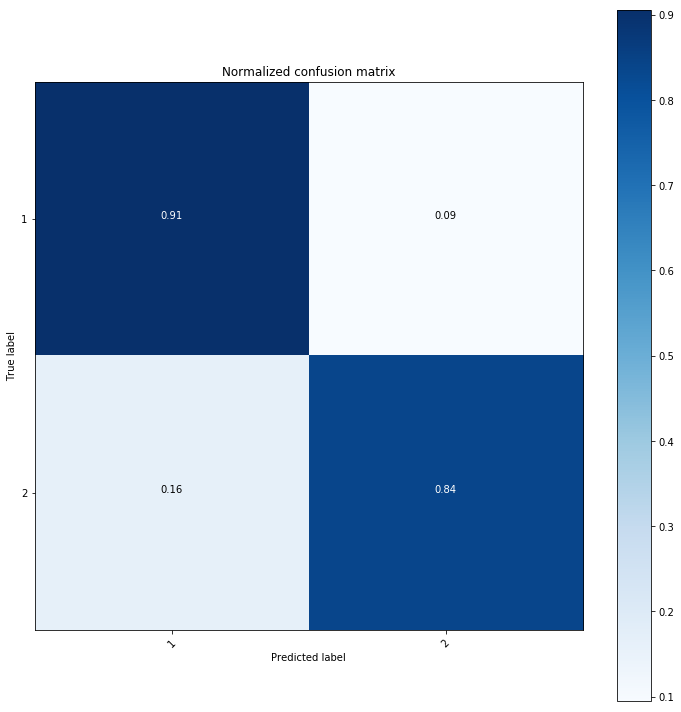

predicting 3 performance


100%|██████████| 609/609 [00:39<00:00, 15.34it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98648649 0.01351351]
 [0.02150538 0.97849462]]


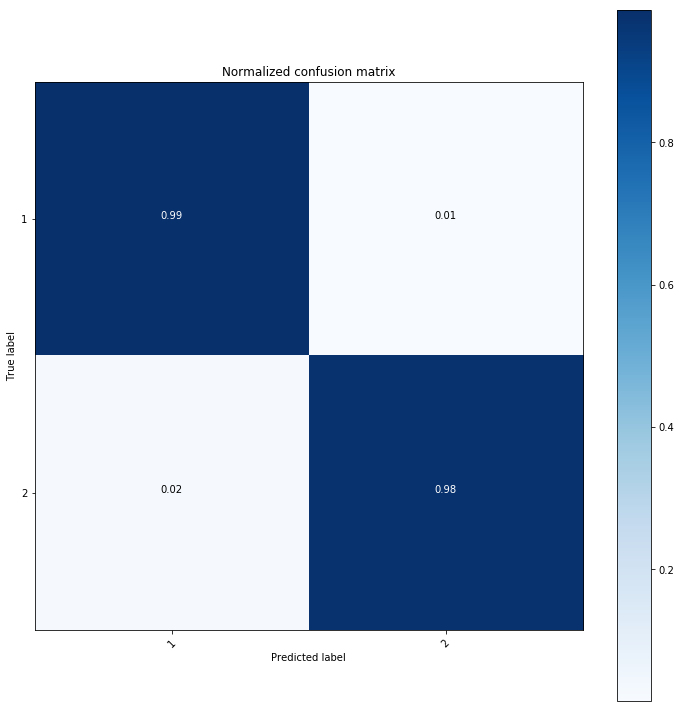

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[ 0.69675853 -0.19461978  0.68772899 ...  1.18734816  0.76759212
  -1.00156047]
 [ 0.25344618  0.51246005  0.26158789 ...  1.62301371  1.50115335
   0.6598236 ]
 [ 2.18648296  0.65389887  2.32110278 ...  1.61832085 -1.30571585
  -2.42456034]
 ...
 [ 1.64370625 -0.27746982  1.97216842 ...  0.20066451 -1.08364198
  -0.13774111]
 [ 1.86112633 -0.34453078  2.17270541 ... -0.40630557  0.05972616
  -1.51534287]
 [ 1.68624399 -0.12727581  2.00224897 ...  1.57959041  0.23758003
  -0.00872099]]


100%|██████████| 609/609 [00:39<00:00, 15.31it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:39<00:00, 15.29it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.65540541 0.34459459]
 [0.91397849 0.08602151]]


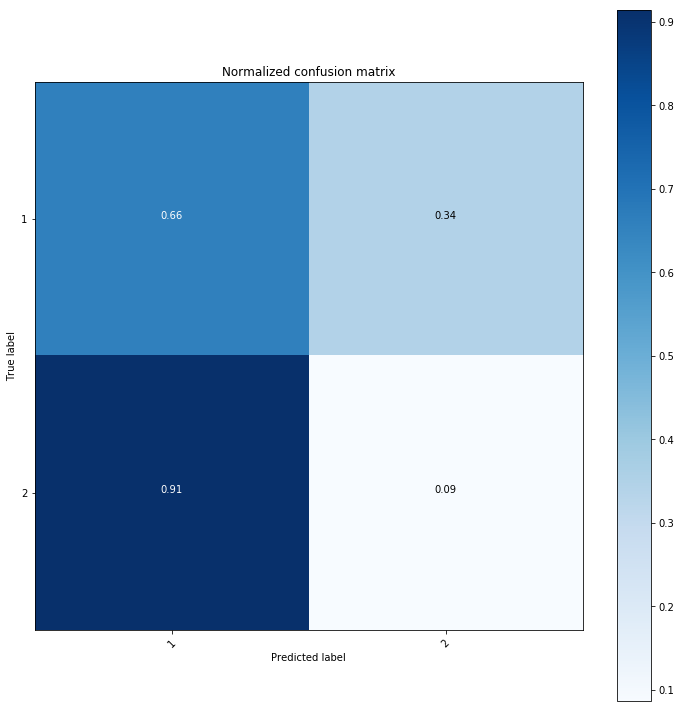

predicting 2 performance


100%|██████████| 609/609 [00:40<00:00, 15.12it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.70945946 0.29054054]
 [0.95698925 0.04301075]]


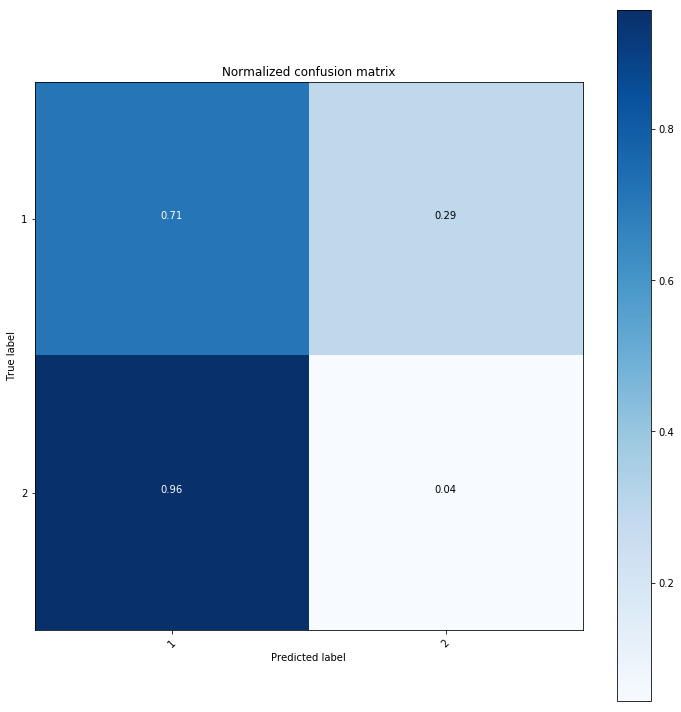

predicting 3 performance


100%|██████████| 609/609 [00:40<00:00, 15.14it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91216216 0.08783784]
 [0.20430108 0.79569892]]


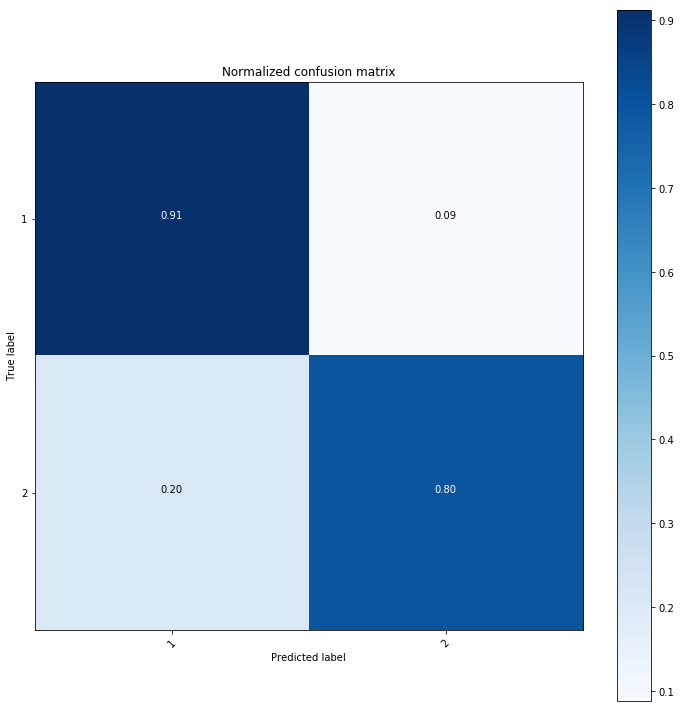

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[-0.03673504 -0.33269763  0.07389176 ... -0.55129426 -0.80455442
  -0.75219079]
 [-0.08489763 -0.33267287  0.01363886 ... -0.3479448  -1.10026831
  -1.08141117]
 [-0.08846743 -0.33312289  0.01124787 ...  0.25644773 -1.5445398
   0.02247607]
 ...
 [ 0.27399314 -0.329349    0.35698474 ...  0.56222698  0.54147991
   0.78964396]
 [ 0.32513637 -0.33099179  0.4048045  ... -0.34369934  1.20398586
  -1.51129389]
 [ 0.29234197 -0.3293852   0.36750509 ...  0.62050896 -0.33247309
  -1.80496529]]


100%|██████████| 609/609 [00:40<00:00, 15.11it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:40<00:00, 15.14it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.90322581 0.09677419]]


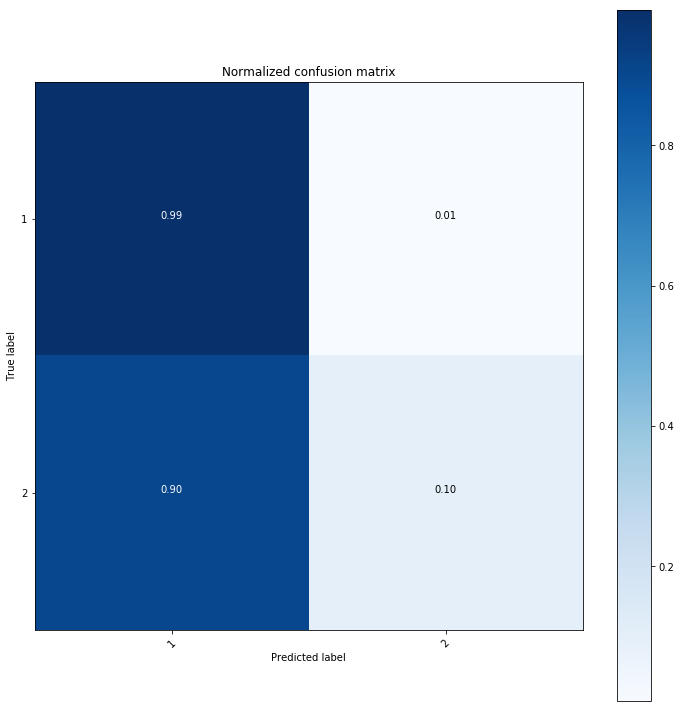

predicting 2 performance


100%|██████████| 609/609 [00:40<00:00, 15.06it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.47311828 0.52688172]]


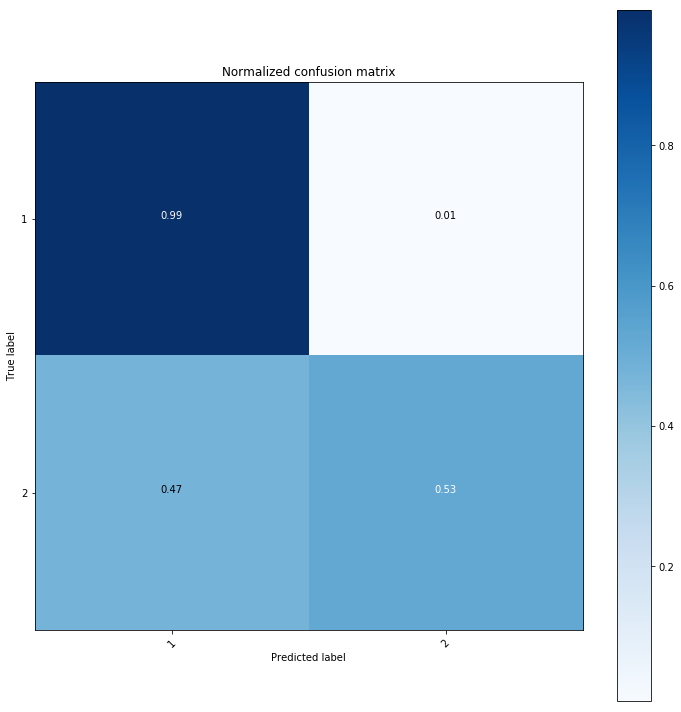

predicting 3 performance


100%|██████████| 609/609 [00:40<00:00, 15.14it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.03225806 0.96774194]]


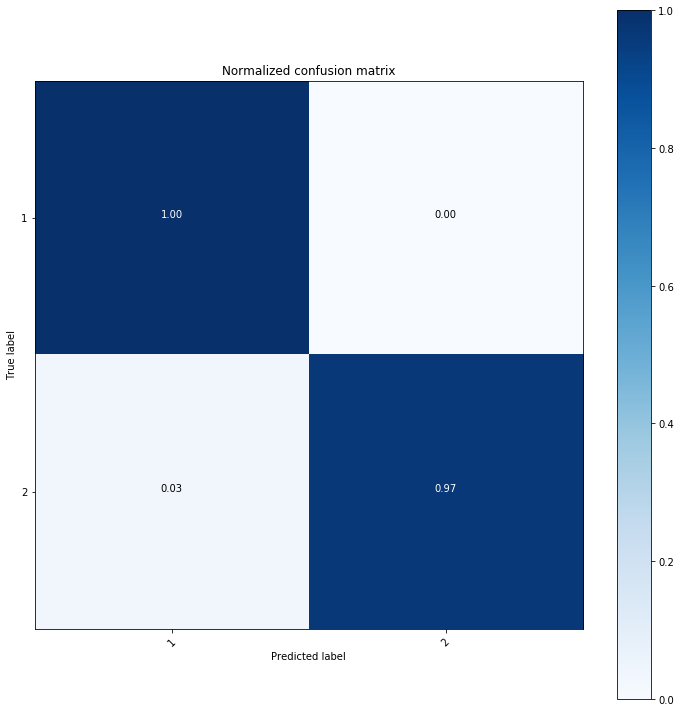

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[ 2.03116896 -0.23142037  1.95980642 ...  0.83784094 -1.17465162
  -0.24596082]
 [ 2.03909774 -0.23006177  1.94494895 ... -0.50337138 -0.51010906
   0.49261145]
 [ 2.07737605 -0.22389783  1.98456886 ...  0.65574641 -0.33193266
  -0.76394396]
 ...
 [ 0.2323485  -0.20238978  0.06102231 ...  0.47714578 -0.71700453
  -0.94062374]
 [ 0.21187292 -0.23564701 -0.04430061 ... -1.01027148 -0.03826415
  -0.79367112]
 [ 0.15591951 -0.20313206 -0.05090393 ... -1.16257832 -1.13539917
   0.19679597]]


100%|██████████| 609/609 [00:40<00:00, 15.14it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:40<00:00, 15.16it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97297297 0.02702703]
 [0.44086022 0.55913978]]


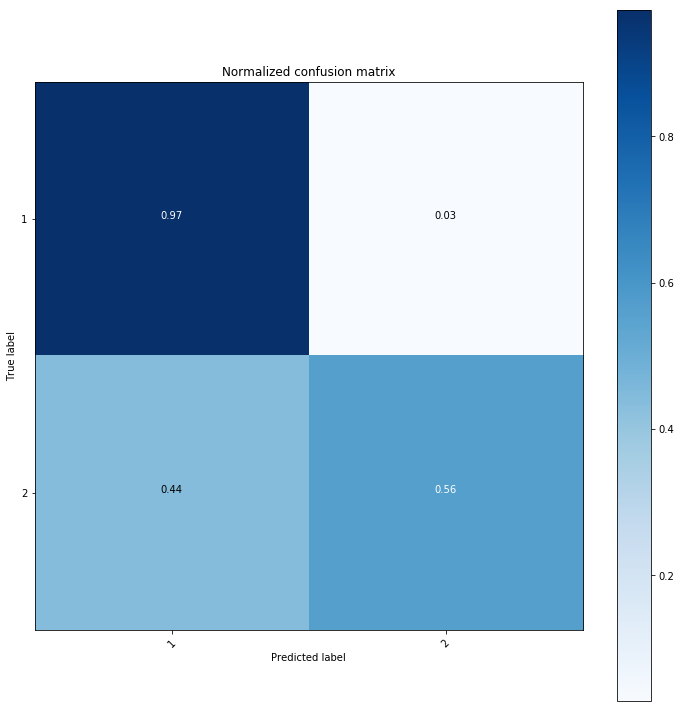

predicting 2 performance


100%|██████████| 609/609 [00:40<00:00, 15.12it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98648649 0.01351351]
 [0.50537634 0.49462366]]


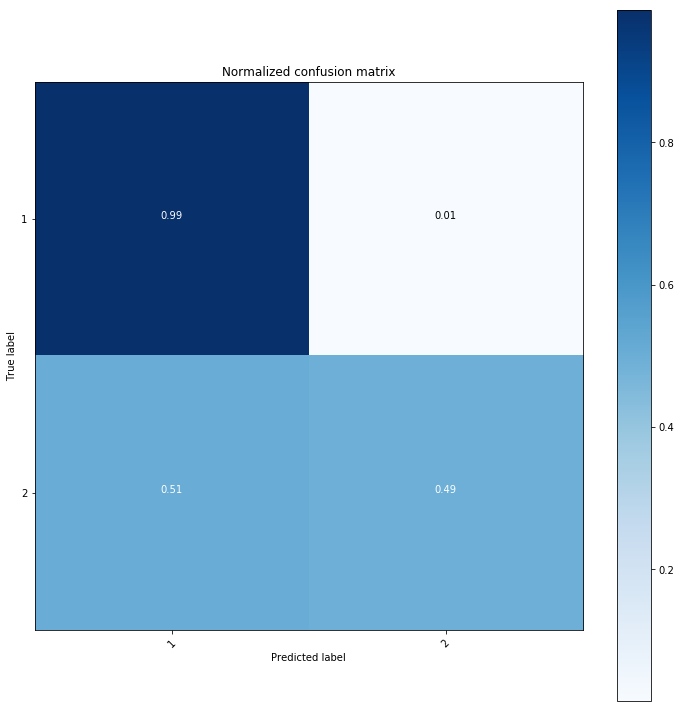

predicting 3 performance


100%|██████████| 609/609 [00:40<00:00, 15.09it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96621622 0.03378378]
 [0.10752688 0.89247312]]


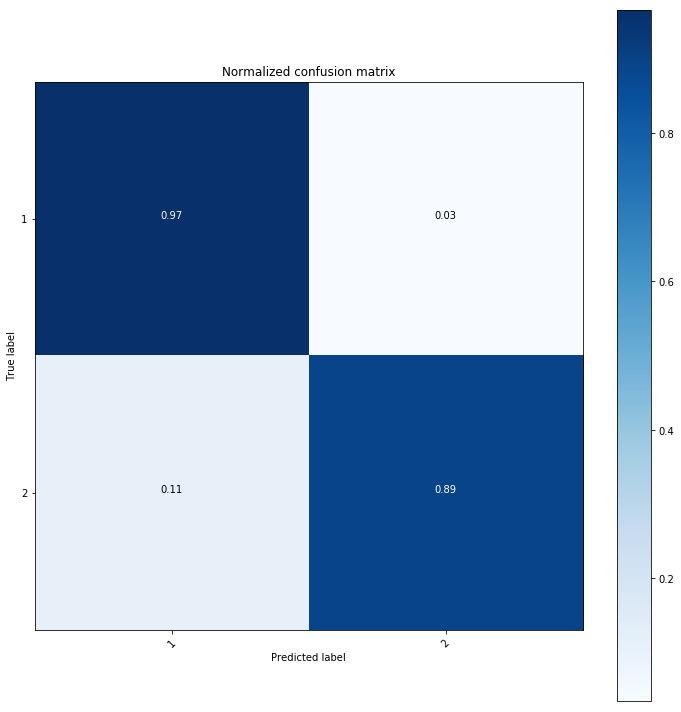

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)